In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
df = pd.read_csv('C:/Users/nigam/Downloads/winequality-red.csv')

In [14]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [16]:
print(df.shape)

(1599, 12)


In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


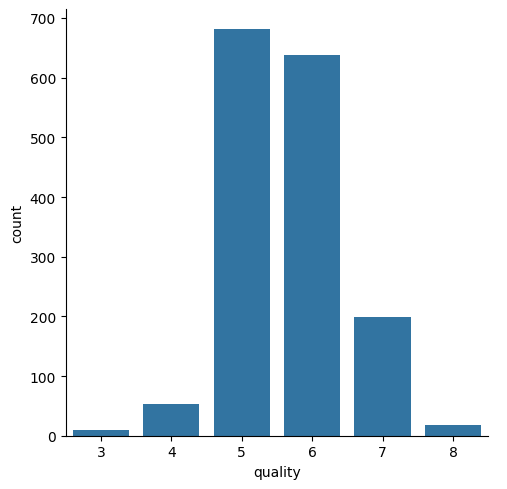

In [20]:
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

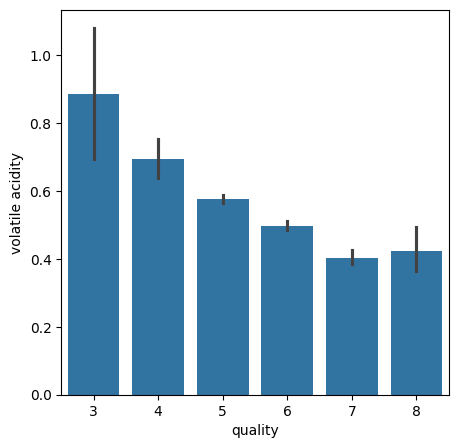

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)


<Axes: xlabel='quality', ylabel='citric acid'>

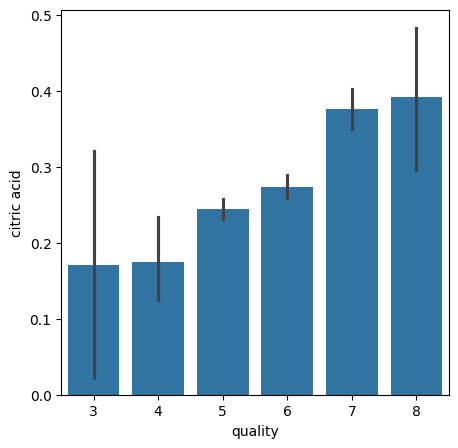

In [22]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)


<Axes: xlabel='quality', ylabel='residual sugar'>

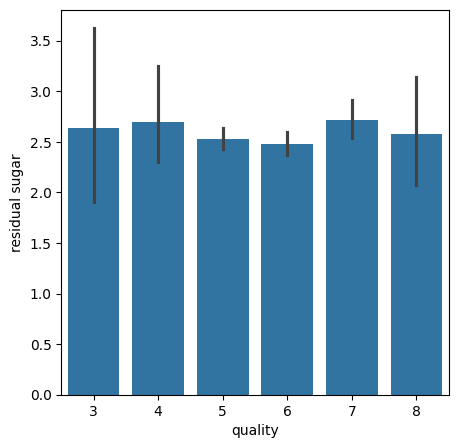

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=df)


<Axes: >

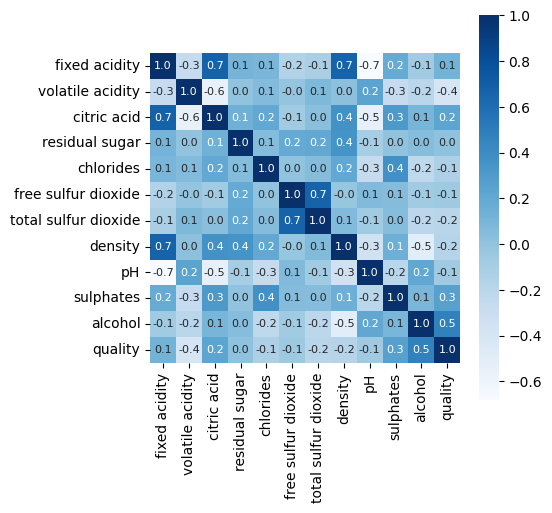

In [24]:
corelation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
wine = load_wine()
X = wine.data
y = wine.target


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
pipelines = {
    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier(random_state=42))
    ]),
    
    "kNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),
    
    "Naive Bayes": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GaussianNB())
    ]),
    
    "Random Forest": Pipeline([
        ("model", RandomForestClassifier(
            n_estimators=100, random_state=42))
    ])
}


In [30]:
results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Decision Tree
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


kNN
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Naive Bayes
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
         

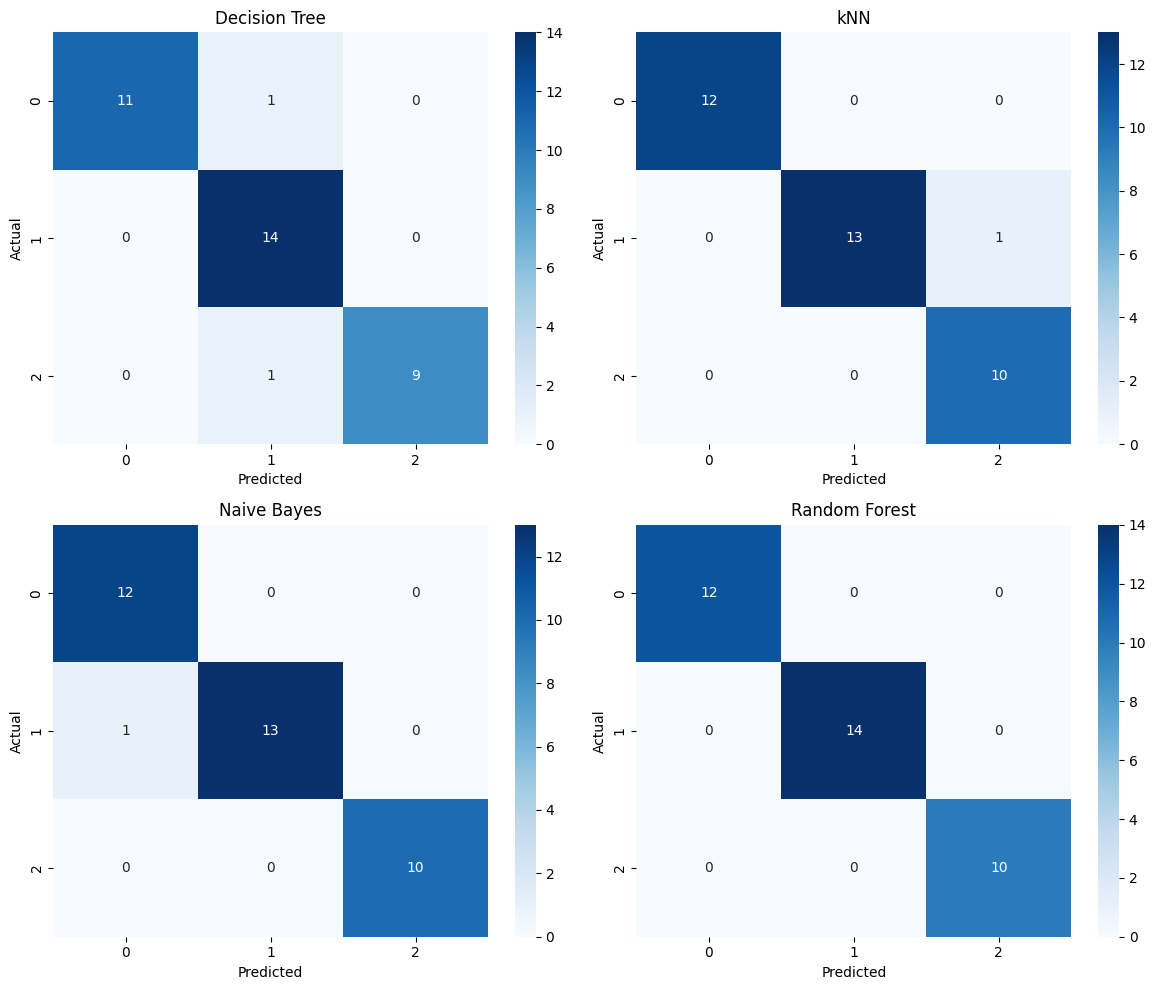

In [31]:
plt.figure(figsize=(12, 10))

for i, (name, pipeline) in enumerate(pipelines.items(), 1):
    plt.subplot(2, 2, i)
    
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


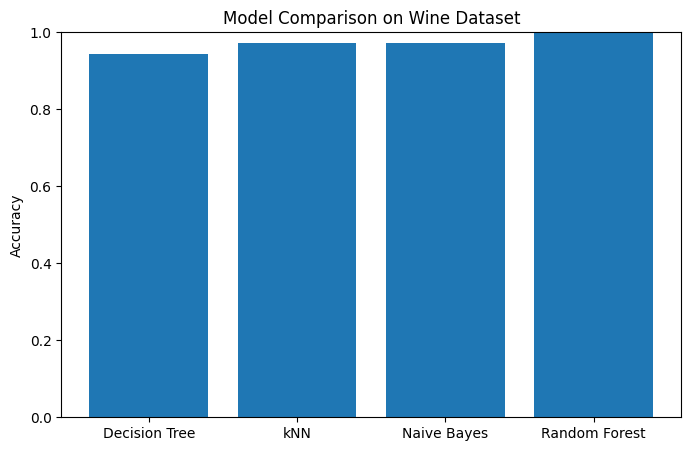

In [32]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison on Wine Dataset")
plt.ylim(0, 1)
plt.show()


In [34]:
Y = df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [40]:
X.shape


(178, 13)

In [41]:
input_data = (13.2, 2.77, 2.51, 18.5, 98,1.15, 2.23, 0.26, 1.46,4.38, 1.05, 3.40, 1050)


input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



In [42]:
prediction = pipelines["Random Forest"].predict(input_data_reshaped)
print(prediction)

[0]


In [45]:
if prediction[0] == 0:
    print("The wine quality is bad")
else:
    print("The wine quality is good")

The wine quality is bad
